# <font color='DarkSlateBlue'>Udacity - Intro Data Analysis</font>
## <font color='NavyBlue'>Titanic Data</font>

__ "O Titanic foi pensado para ser o navio mais luxuoso e mais seguro de sua época, gerando lendas que era supostamente "inafundável"." __ 

A viagem que cuminou com o naufrágio do RMS Titanic teve inicio em Southampton/Reino Unido em 10/04/1912, passando por Cherbourg-Octeville/França e por Queenstown/Irlanda. No dia 14 de abril ele colidiu com um iceberg e afundou, na madrugada seguinte, com mais 1500 pessoas a bordo.

Um fato curioso, que pode nos auxiliar na análise de dados, foi que durante a evacuação dos passageiros o capitão Smith dirigiu-se para dois oficiais (Lightoller e Murdoch)  e disse: "coloque as mulheres e crianças e abaixe-os". Os dois interpretaram a ordem de forma diferente, sendo que Ligthtoller entendeu que somente podiam embarcar mulheres e crianças e quando não havia ninguém desse grupo, ele lançava os botes vazios. Murdoch permitia que homens embarcassem depois das mulheres e crianças. Por não saberem o total de pessoas que o bote suportava, vários foram lançados com metade de sua capacidade sem utilização.

Fonte: https://pt.wikipedia.org/wiki/RMS_Titanic

### Questões que irão guiar a análise:

1. Sabendo que houve esse mal entendido na distribuição dos passageiros por botes, a fonte de dados titanic.cvs nos fornece alguma informação que reflete esse mal entendido entre os oficiais?
2. Mulheres e crianças tiveram maior chance de sobreviver?
3. A classe, foi um fator importante para a sobrevivência? 
4. E a pergunta me faço é se eu estivesse lá, mulher, jovem adulta, na 2º classe é provável que teria sobrevivido?

Chega de dúvidas, vamos iniciar a análise dos dados!

## Preparando o ambiente: Importando as bibliotecas e os dados

In [1]:
#importando as bibliotecas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import pandas as pd
import numpy as np

In [2]:
#Machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn import  model_selection, tree, preprocessing, metrics

In [3]:
filename = 'C:/Nanodegree/Intro_Data_Analys/titanic_data.csv'
titanic_df = pd.read_csv(filename, header=0)

In [4]:
titanic_df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Trabalhando os dados

Nesta fase vamos fazer uma faxina nos dados e retirar tudo que possa interferir no resultado da análise e da predição de dados.
Como tudo, você pode considerar valores nulos, colunas com muitos valores nulos, colunas com informações que não pertinentes para o foco do análise, valores muito acima ou abaixo da média e valores zerados.
Os números e a decisão de manter ou não um dado será demonstrado nesta seção.

**Conhecendo melhor as colunas do dataset:**
- Embarked: Porto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)
- Parch: Número de pais e filhos a bordo
- Pclass: Classe que o passageiro embarcou (1 = 1º classe; 2 = 2º classe; 3 = 3º classe)
- Sex: Gênero feminino (female) ou male (masculino)
- Sibsp: Numero de irmãos e esposa a bordo
- Survived: 0 - Não sobreviveu e 1 = sobreviveu


Pelas questões que foram levantandas vamos assumir que as variáveis que devem ser investigadas mais afundo são:
- Idade
- Sexo
- Acompanhantes: SibSp + Parch
- Classe

In [5]:
# Verifica  o tipo dos dados criados
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Manipulando as variáveis

#### 1º Tipo de manipulação: Valores ausentes

A existência de colunas com dados ausentes será verificada porque estas ausências podem interferir na análise. 
O tratamento do dado ausente levará em consideração o percentual (%) de ausências e a relevância da informação para a conclusão. 

Começaremos este processo identificando quais são as colunas com valores ausentes através da contagem dos valores existentes e divisão pelo total de linhas da coluna.

In [7]:
((len(titanic_df) - titanic_df.count()) / len(titanic_df)) *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

** Valores ausentes: Age **

20% dos dados da coluna Age estão ausentes. Sabemos que a idade foi um dos critérios de seleção que permitia o passageiro entrar ou não no bote salva vidas. Então, presumindo uma importância, não vou optar por excluir a coluna ou as linhas sem valores. Para este caso, uma boa estratégia será atribuir a média da coluna para em todos ausentes.

In [8]:
titanic_df.Age.fillna(0).describe()

count    891.000000
mean      23.799293
std       17.596074
min        0.000000
25%        6.000000
50%       24.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Atribuindo a média da coluna em todas as células com valores NaN:

In [9]:
titanic_df.Age = titanic_df.Age.fillna(titanic_df.Age.mean())

**Valores ausentes: Cabin**

In [10]:
titanic_df.Cabin.describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

* 77% da coluna é composta por valores nulos. Dos 204 valores existentes, 147 são únicos e os registros mais repetidos 
aparecem apenas 4 vezes. Como top foram listados os valores C23, C25, C27, todos eles são iniciados pela letra C, o que pode 
indicar a existência de um padrão na montagem do campo. Esta possibilidade não será investigada nesta análise, e o campo será 
excluído devido ao alto percentual de nulos.

** Valores ausentes: Embarked ** 

Embarked tem pouquíssimos valores ausentes (0.2%), nesse caso seria cabível até excluir estes registros, mas o porto onde o passageiro embarcou não tem relevância na ótica desta análise. Esta coluna será excluida por completo ao fim desta seção.

In [11]:
# Embarked tem valores nulos
titanic_df.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

#### 2º Tipo de manipulação: Dados derivados 

Durante a análise pode ser necessário criar outros dados a partir dos existentes, esse recurso será usado sempre que for identificado um benefício em ver a informação sob outra perspectiva ou acessá-la mais facilmente.

** Dados derivados: Acompanhantes (Family) **

* As variáveis SibSp e Parch tem a mesma raiz de informação (total de acompanhantes), para facilitar a análise, será criada 
uma nova coluna derivada chamada Family que conterá o total de acompanhantes (SibSp + Parch). Estar acompanhado tem alguma importância para a sobrevivência? Ter toda a informação em uma só coluna facilitará a análise.

In [12]:
# Cria a coluna Family
titanic_df['Family'] = titanic_df['SibSp'] + titanic_df['Parch']

** Dados derivados: Faixa etária (AgeRange) **

A coluna AgeRange será criada para facilitar a análise da faixa etária sobrevivente. Apesar de ter 32 anos, expandirei a pesquisa para faixa etária para que a análise não fique tão pontual. 

In [13]:
# Descobre a faixa etária baseado na idade do passageiro(Titanic_df.Age)
def age_range(idade):
    """ 
    Retorna a faixa etária para a idade informada.

    Args:
        idade: Valor número que representa a idade.
    Returns:
        Retorna uma string com a faixa etária identificada para idade.
        Domínio de valores = Idoso, Adulto, Jovem Adulto, Adolescente e Crianca.
    """    
    
    if idade >= 65:
        return 'Idoso'
    elif idade >= 33:
        return 'Adulto'
    elif idade >= 18:
        return 'Jovem Adulto'
    elif idade >= 12:
        return 'Adolescente'
    else:
        return 'Crianca'    

In [14]:
# Chama a função age_range passando como o parametro a coluna Age e atribui o resultado a nova coluna AgeRange
titanic_df['AgeRange']= titanic_df.Age.apply(age_range) 

In [15]:
titanic_df.AgeRange.describe()

count              891
unique               5
top       Jovem Adulto
freq               512
Name: AgeRange, dtype: object

O meu grupo "Jovem Adulto" é o mais frequente do conjunto de dados. Veja a distribuição dos dados:

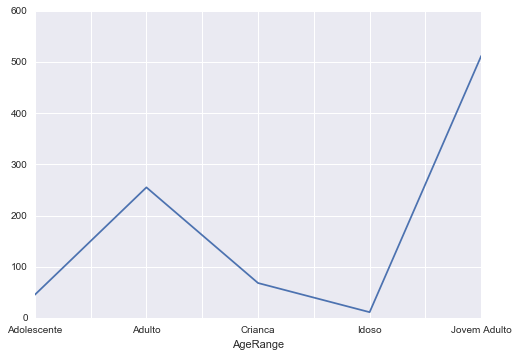

In [16]:
# Imprime gráfico com o total de passageiros por faixa etária.
titanic_df.groupby(['AgeRange']).size().plot()

#### 3º Tipo de manipulação: Dados irrelevantes ou inadequados 

- Embarked, Ticket, PassengerId e Name são colunas irrelevantes para o contexto da análise. 
- Saber onde Nome do passageiro, ou seu número de identificação não irá interferir no tipo de análise que será feito.
- Embarked e Ticket são variáveis que podem, em outra análise, serem aprofundadas. Isto não será realizado neste estudo.

O último passo da manipulação é excluir do conjunto de dados as variáveis consideradas irrelevantes ou inadequadas. SibSp e Parch serão excluídas porque o conteúdo delas está replicado na coluna Family.

In [17]:
# Apaga as colunas
titanic_df.drop(['PassengerId','SibSp', 'Parch', 'Cabin','Embarked', 'Ticket','Name'], axis=1, inplace=True)

titanic_df.head()

,Survived,Pclass,Sex,Age,Fare,Family,AgeRange
0,0,3,male,22.0,7.2500,1,Jovem Adulto
1,1,1,female,38.0,71.2833,1,Adulto
2,1,3,female,26.0,7.9250,0,Jovem Adulto
3,1,1,female,35.0,53.1000,1,Adulto
4,0,3,male,35.0,8.0500,0,Adulto


## Sumário estatístico
Aplicada aos valores numéricos

- count: Total de elementos não nulos
- mean: Média
- std: Desvio Padrão
- min: Maior valor da amostra
- max: Menor valor da amostra
- 25%: Quartil 1, corresponde a 25% da amostra
- 50%: Quartil 2 ou mediana da amostra
- 75%: Quartil 3, corresponde a % da amostra

In [18]:
titanic_df.describe()

,Survived,Pclass,Age,Fare,Family
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208,0.904602
std,0.486592,0.836071,13.002015,49.693429,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,7.910400,0.000000
50%,0.000000,3.000000,29.699118,14.454200,0.000000
75%,1.000000,3.000000,35.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,10.000000


**Observações:**

* Todas as linhas de todas as colunas estão preenchidas com 891 registros cada.
* A idade dos passageiros está entre 0.42 e 80 anos. 

### Toda hora é hora de trabalhar os dados 

Apesar de ter tratado os dados na seção 'Trabalhando os dados', ao desrever os dados no 'Sumário estatístico', percebi que o conjunto de dados passa a impressão de que os passageiros estavam acompanhados, o menor valor de passagem é 0 e o maior é 512, bem distante da média que é 32.

Vamos investigar e tratar essas variáveis.

* Média de Family

A média de Family é 0.9, dando a impressão de que a maior parte dos passageiros estava acompanhada. 
Confirmando essa informação:

In [19]:
((len(titanic_df.Family) - titanic_df[titanic_df['Family']>0].count()) / len(titanic_df.Family)) *100

Survived    60.26936
Pclass      60.26936
Sex         60.26936
Age         60.26936
Fare        60.26936
Family      60.26936
AgeRange    60.26936
dtype: float64

60% dos passageiros estavam desacompanhados. Bem, se a maioria dos passageiros estava desacompanhado, é possível que o total de acompanhantes seja próximo do total de passageiros.  

In [20]:
# Soma dos registros de Family
titanic_df.Family.sum()

806L

O total da soma de familiares é quase similar ao total de valores da coluna Family. Quando calculado a média, fica a impressão de a maioria dos passageiros esta acompanhado. 

Verificando se algum padrão neste dado:

In [21]:
# Lista os valores únicos da quantidade de acompanhantes por passageiros
titanic_df.Family.unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

Já sabemos que a maior parte dos passageiros estava desacompanhada, será que há uma relação diferente desta variável com os mortos e sobreviventes?

Agrupa os dados de family e Survived, com o objetivo de descobrir se ha uma relação entre o número de acompanhantes  e a sobrevivência. 

In [22]:
acompanhante_sobrevivencia = titanic_df.groupby(['Family','Survived']).size()
acompanhante_sobrevivencia

Family  Survived
0       0           374
        1           163
1       0            72
        1            89
2       0            43
        1            59
3       0             8
        1            21
4       0            12
        1             3
5       0            19
        1             3
6       0             8
        1             4
7       0             6
10      0             7
dtype: int64

Visualizando o mapa da distribuição dos sobreviventes por número de acompanhantes:

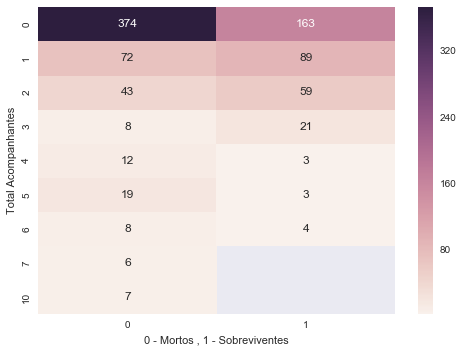

In [23]:
sb.heatmap(acompanhante_sobrevivencia.unstack(), annot=True, fmt='g')
plt.xlabel('0 - Mortos , 1 - Sobreviventes')
plt.ylabel('Total Acompanhantes')

Através do gráfico é possível confirmar que a maior parte dos passageiros estava desacompanhando. Se a análise se baseasse apenas nestas duas colunas, sem considerar classe, sexo e o valor da passagem, estar desacompanhado comporia o grupo com menor probabilidade de sobreviver.

#### 4º Tipo de manipulação: Dados discrepantes (outliers)

Tratamos dados ausentes, irrelevantes e derivados, agora encontramos um novo tipo de dado que precisa ser manipulado, porque a discrepância de seu conteúdo pode influenciar/induzir significativamente o resultado final.

** Dados discrepantes: Fare **

Fare tem duas questões que precisa ser avaliada. A primeira é o preço máximo do ticket é 512 sendo que a o valor médio 32. Vou aprofundar na análise desse dados porque estes outliers podem interferir no resultado. A segunda é que o valor mínimo é 0. Pode ser, por exemplo, tickets de crianças. Isto será verificado a seguir.

Questão 1: O maior valor de Fare é realmente discrepante? 

In [24]:
# Ordena os dados em ordem descente para verificar se existem muitos valores altos como o max=512.
titanic_df.Fare.sort_values(ascending=False).head(30)

679    512.3292
258    512.3292
737    512.3292
341    263.0000
438    263.0000
88     263.0000
27     263.0000
311    262.3750
742    262.3750
299    247.5208
118    247.5208
716    227.5250
557    227.5250
380    227.5250
700    227.5250
527    221.7792
377    211.5000
689    211.3375
730    211.3375
779    211.3375
318    164.8667
856    164.8667
268    153.4625
332    153.4625
609    153.4625
297    151.5500
305    151.5500
498    151.5500
708    151.5500
31     146.5208
Name: Fare, dtype: float64

O maior valor (512.3292) está muito distante do segundo maior valor (263.0000). Os outros valores são bem aproximados um dos outros. A menos que existam 3 cabines de luxo com uma tarifa exorbitante, o que eu não acredito, há provavelmente uma falha nos dados. Para os passageiros com a passagem igual ao maior valor, vou atribuir o segundo maior valor.  

In [25]:
# Lista os 10 maiores valores de Fare, mas a lista tem valores repetidos, então filtra
# somente unicos(.unique) e retorna a segunda linha [1], porque a primeira é o Max. 
second_max_fare = titanic_df.Fare.nlargest(10).unique()[1]
second_max_fare

263.0

In [26]:
# Atribui o segundo valor mais alto da coluna(second_max_fare) 
# onde Fare é igual ao valor máximo da coluna
titanic_df.Fare = titanic_df.Fare.apply(lambda x: second_max_fare if x==titanic_df.Fare.max() else x)

In [27]:
# Confere se o max foi alterado para o segundo valor.
titanic_df.Fare.max()

263.0

Questão 2: Os valores zerados são de crianças ou idosos? Eles tem algum fator em comum?

In [28]:
# Pesquisa resultado onde o valor da passagem é igual a 0.
titanic_df[titanic_df['Fare']==0]

,Survived,Pclass,Sex,Age,Fare,Family,AgeRange
179,0,3,male,36.000000,0.0,0,Adulto
263,0,1,male,40.000000,0.0,0,Adulto
271,1,3,male,25.000000,0.0,0,Jovem Adulto
277,0,2,male,29.699118,0.0,0,Jovem Adulto
302,0,3,male,19.000000,0.0,0,Jovem Adulto
413,0,2,male,29.699118,0.0,0,Jovem Adulto
466,0,2,male,29.699118,0.0,0,Jovem Adulto
481,0,2,male,29.699118,0.0,0,Jovem Adulto
597,0,3,male,49.000000,0.0,0,Adulto
633,0,1,male,29.699118,0.0,0,Jovem Adulto


A teoria de que podiam ser ingressos gratuitos por causa da idade não se confirmou. No grupo não tem crianças nem idosos. Em comum os dados tem o gênero masculino e ausência de acompanhantes. Acredito que seja mais uma provável falha nos dados e para este caso vou atribuir o valor médio da coluna Fare.

In [29]:
# Retorna a média da coluna Fare quando o valor passado como parametro é igual a 0.
titanic_df.Fare = titanic_df.Fare.apply(lambda x: titanic_df.Fare.mean() if x==0 else x)  

In [30]:
# Sumariza os dados novamente
titanic_df.Fare.describe()

count    891.000000
mean      31.892741
std       43.062619
min        4.012500
25%        7.925000
50%       15.100000
75%       31.364716
max      263.000000
Name: Fare, dtype: float64

Como pode ser constatado, o valor mínimo (min) passou a ser 4.01 e o máximo(max) 263.

## Mais um pouco de estatítica
### Correlação de Pearson
Qual a corelação das variáveis como fator sobrevivência? O método pearson (.corr) foi utilizado para demonstrar a dependência  entre elas. O valor pode variar entre 0 e 1, tanto negativo quanto positivo.
Espera-se um grau de correlação superior a 0.5 para demonstrar uma correlação de moderada a muito forte.
    

In [31]:
titanic_df.corr(method='pearson', min_periods=1)

,Survived,Pclass,Age,Fare,Family
Survived,1.000000,-0.338481,-0.069809,0.264212,0.016639
Pclass,-0.338481,1.000000,-0.331339,-0.609074,0.065997
Age,-0.069809,-0.331339,1.000000,0.099607,-0.248512
Fare,0.264212,-0.609074,0.099607,1.000000,0.250601
Family,0.016639,0.065997,-0.248512,0.250601,1.000000


Como a coluna Sex não é numérica, não foi calculada a correlação para ela. Acredito que ela tenha uma correlação com survived, então vou transformá-la em número, numa coluna adicional, para mensurar a correlação.

In [32]:
# Atribuí um valor inteiro para os valores categorizados de Sex (0 - female, 1 - male)
titanic_df['SexInt'] = map(int, titanic_df.Sex == 'male')

In [33]:
# Chama o método de corrlação passando o tipo pearson como parâmetro e guarda os valores em um dataframe.
correlation_df = titanic_df.corr(method='pearson', min_periods=1).abs()
correlation_df

,Survived,Pclass,Age,Fare,Family,SexInt
Survived,1.000000,0.338481,0.069809,0.264212,0.016639,0.543351
Pclass,0.338481,1.000000,0.331339,0.609074,0.065997,0.131900
Age,0.069809,0.331339,1.000000,0.099607,0.248512,0.084153
Fare,0.264212,0.609074,0.099607,1.000000,0.250601,0.202137
Family,0.016639,0.065997,0.248512,0.250601,1.000000,0.200988
SexInt,0.543351,0.131900,0.084153,0.202137,0.200988,1.000000


O objetivo desta análise é pontuar a correlação entre as variáveis do nosso conjunto de dados, sem intenção nenhuma de estabelecer, através destes números, uma causa para a sobrevivência ou definir valores estatísticos sem teste controlado associado.

Foi importante adicionar a SexInt para representar a variável Sex. As variáveis Sex(SexInt) e Pclass são as mais correlacionadas com Survived. Faz sentido se pensarmos que a localização da cabine pode ter feito diferença e que as mulheres e crianças tiveram prioridade numa situação de emergência.
Pclass e Fare também estão correlacionadas, principalmente porque o tipo/classe cabine são fatores para composição dos valores de passagens.

**Classificação do resultado - correlação _p_**

In [34]:
correlation_df.unstack().sort_values(ascending=False)

SexInt    SexInt      1.000000
Family    Family      1.000000
Pclass    Pclass      1.000000
Age       Age         1.000000
Fare      Fare        1.000000
Survived  Survived    1.000000
Fare      Pclass      0.609074
Pclass    Fare        0.609074
Survived  SexInt      0.543351
SexInt    Survived    0.543351
Pclass    Survived    0.338481
Survived  Pclass      0.338481
Pclass    Age         0.331339
Age       Pclass      0.331339
Fare      Survived    0.264212
Survived  Fare        0.264212
Fare      Family      0.250601
Family    Fare        0.250601
Age       Family      0.248512
Family    Age         0.248512
SexInt    Fare        0.202137
Fare      SexInt      0.202137
SexInt    Family      0.200988
Family    SexInt      0.200988
SexInt    Pclass      0.131900
Pclass    SexInt      0.131900
Fare      Age         0.099607
Age       Fare        0.099607
SexInt    Age         0.084153
Age       SexInt      0.084153
          Survived    0.069809
Survived  Age         0.069809
Pclass  

=> Correlação moderada _p_>0.5
* Survived x SexInt
* Pclass   x Fare

=> Correlação fraca _p_ >0.3
* Pclass   x Survived
* Pclass   x Age

=> Correlação desprezível
* Survived x Fare    
* Family   x Fare
* Family   x Age
* Fare     x SexInt 
* Family   x SexInt 
* Pclass   x SexInt     
* Age      x Fare       
* Age      x SexInt  
* Survived x Age 
* Pclass   x Family 
* Survived x Family 

## Visualizando os dados - Análise exploratória


Os dados estão limpos e prontos para serem visualizados. 

Começaremos a análise exploratória com uma visão geral de todas as colunas e o relacionamento dos seus dados. 
Os dados estão agrupados em 0 -mortos e 1 - sobreviventes  

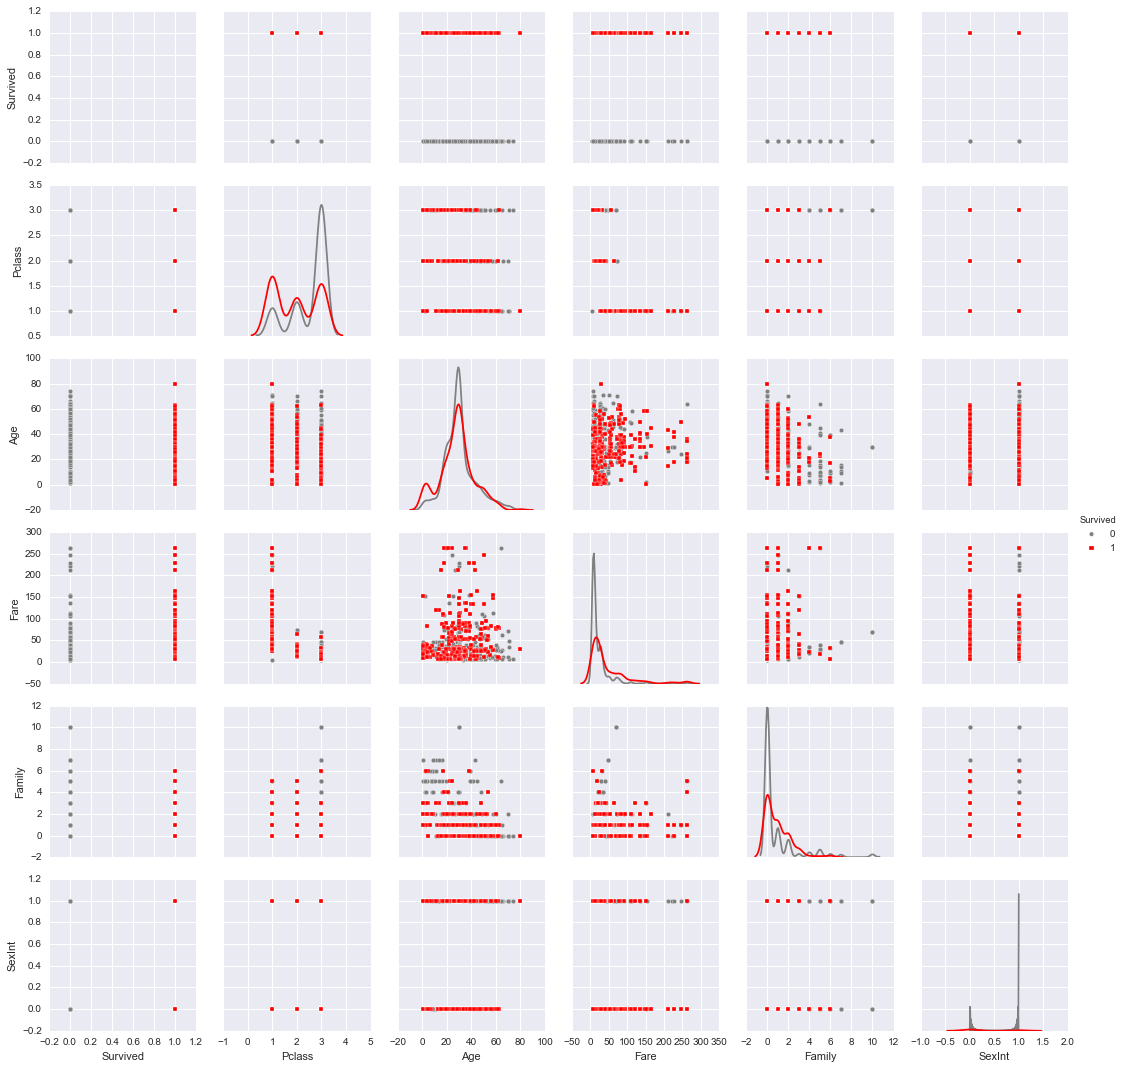

In [35]:
# Visão geral de todas as variáveis com a ajuda do pairplot(). 
sb.pairplot(titanic_df, hue='Survived', diag_kind='kde', size=2.5, markers=['o','s'], palette=['gray','red'])

Esta visualização geral auxilia na escolha de quais dados devem ser selecionados para uma exibição mais detalhada. Por exemplo, em SexInt está claro que mais homens morreram no Titanic. Em Pclass pode ser percebido um maior volume de mortos na 3º classe. 

### Visualizando Age e Pclass

Através dos gráficos tentaremos compreender melhor o conteúdo e importância da idade para a sobrevivência, além de seu relacionamento com a classe - Pclass.

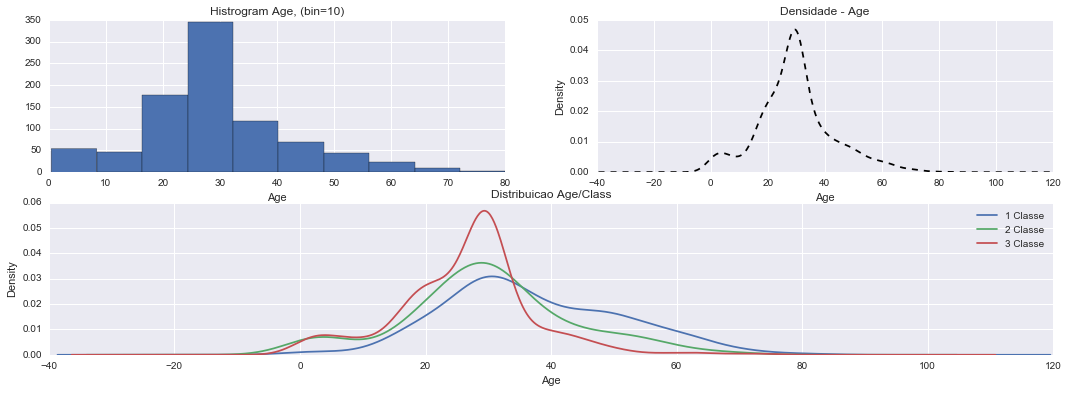

In [36]:
fig = plt.figure(figsize=(18,6), dpi=1600) 

# criando o subplot1 
ax1 = plt.subplot(2,2,1)
#Histogram da coluna Age
titanic_df.Age.hist(bins=10) 
#Definindo o label de x - Age
plt.xlabel("Age")
#Definindo o titulo do grafico
plt.title("Histrogram Age, (bin=10)")    

# criando o subplot2 
ax2 = plt.subplot(2,2,2)
#Plotando o grafico de densidade da coluna Age
titanic_df['Age'].plot(kind='kde', style='k--')
#Definindo o label do eixo y
plt.ylabel("Density")
#Definindo o label do eixo de x
plt.xlabel("Age")
#Definindo o titulo do grafico
plt.title("Densidade - Age")

# criando o subplot3
ax3 = plt.subplot(2,2,(3,4))
#plotando a densidade por classe
titanic_df.groupby('Pclass').Age.plot.kde()
#Definindo o label do eixo de x
plt.xlabel("Age")  
#Definindo o titulo do grafico
plt.title("Distribuicao Age/Class")
#Definindo a legenda
plt.legend(('1 Classe', '2 Classe','3 Classe'),loc='best') 

- A maior parte dos passageiros tem entre 20 e 40 anos.
- A 3º classe tem a maioria dos passageiros jovens e a 1º tem uma distribuição mais uniforme das idades, inclusive com a maior parte dos passageiros idosos.
- A distribuição do histograma da idade é normal.

### Visualizando Survived, Pclass e Sex

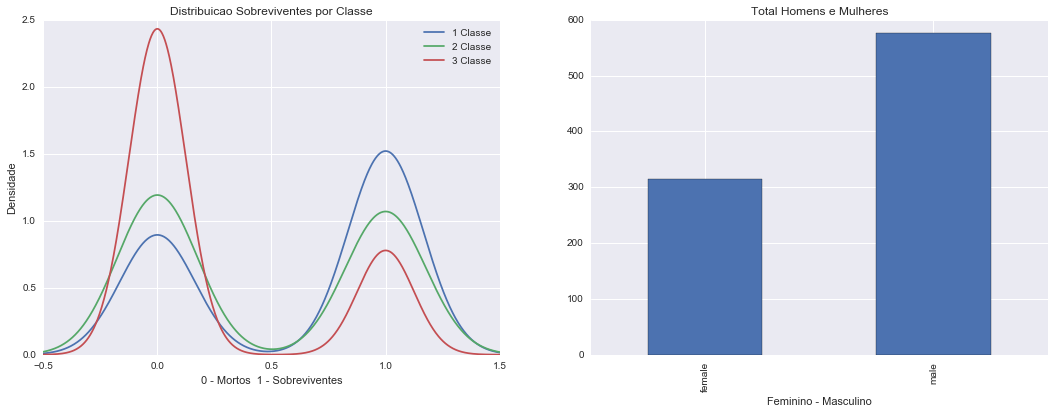

In [37]:
fig = plt.figure(figsize=(18,6), dpi=1600) 
# tentar subplot com sb
# Cria o subplot1 
ax1 = plt.subplot(1,2,1)
# Imprime gráfico com a densidade de sobreviventes por classe
titanic_df.groupby('Pclass').Survived.plot.kde()

# Define o label dos eixos x e y
plt.xlabel("0 - Mortos  1 - Sobreviventes")
plt.ylabel("Densidade")
# Define o título do gráfico
plt.title("Distribuicao Sobreviventes por Classe")
# Define a legenda
plt.legend(('1 Classe', '2 Classe','3 Classe'),loc='best') 

# Cria o subplot2 
ax2 = plt.subplot(1,2,2)
# Imprime gráfico com o total de homens e mulheres no titanic
titanic_df.groupby('Sex').count()['Survived'].plot.bar()
plt.xlabel("Feminino - Masculino")
# Define o título do gráfico
plt.title("Total Homens e Mulheres")

* A distribuição dos mortos e sobreviventes por classe não deixa dúvida da relação entre essas variáveis. O maior volume de mortos estão na 3º classe e de sobreviventes na 1º. A segunda classe tem uma pequena variação. A relação entre a classe e a sobrevivência foi uma das questões levantandas no início do do trabalho. Não é possível afirmar que estar em uma determinada classe seja a causa da sobrevivência, através dos dados só é possível observar que a maior parte dos sobreviventes estava na 1º classe.
* No conjunto de dados a maioria dos passageiros eram homens.

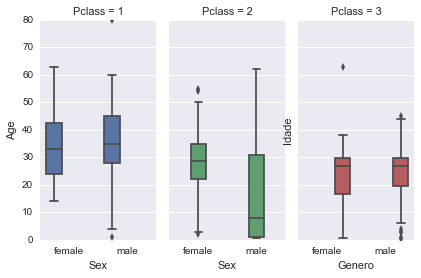

In [38]:
# Cria série com os dados de todos os sobreviventes
sobreviventes = titanic_df[titanic_df['Survived']==1]

# Para os sobreviventes, calcula a média da idade por classe e gênero  
#sobreviventes.groupby(['Pclass','Sex']).mean()['Age'].plot.bar()
sb.factorplot(x="Sex", y="Age", hue="Pclass",
               col="Pclass", data=sobreviventes, kind="box", size=4, aspect=.5)

# Define configurações do grafico 
plt.xlabel("Genero")
plt.ylabel('Idade')

* Através dos gráficos acima começamos a traçar parte do perfil dos sobreviventes, sabemos que a maioria estava na terceira classe e que tinham entre 20 e 40 anos.
* Na 2º classe, objeto da investigação, a maioria das sobreviventes tinha idade entre 25 e 35 anos.
* A maior parte dos homens sobreviventes da 2º classe tinham no máximo 30 anos.

### Respondendo aos questionamentos iniciais

Agora que conhecemos melhor os dados e já começamos a identificar as características mais comuns aos sobreviventes, tentaremos responder aos questionamentos que motivaram esta análise com uma investigação mais detalhada.

** Questão 1: Sabendo que houve esse mal entendido na distribuição dos passageiros por botes, a fonte de dados titanic.cvs nos fornece alguma informação que reflete esse mal entendido entre os oficiais? **

Sabemos até o momento que a maioria dos passageiros eram homens, Jovem adulto era a faixa estária mais comum e que a maior parte dos mortos estava na 3º classe. Os oficiais do Titanic priorizaram crianças e mulheres e é de se esperar, por esta razão, que os homens tenham uma taxa de sobrevivência menor. 

Não será feita nenhuma análise detalhada na coluna Age, usaremos a coluna derivada AgeRange que contém a faixa etária do passageiro.

[<matplotlib.text.Text at 0x1296b438>, <matplotlib.text.Text at 0x12cddda0>]

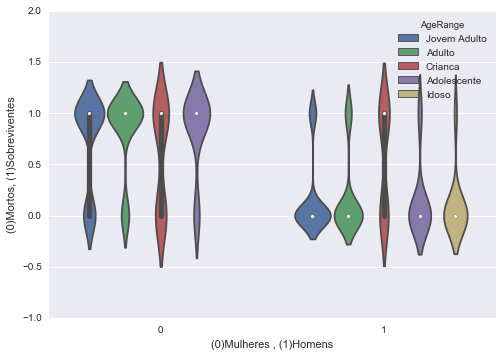

In [39]:
# Imprime violinplot com a distribuição dos sobreviventes por sexo e faixa etária
ax = sb.violinplot(data=titanic_df, x='SexInt', y='Survived', hue='AgeRange')
ax.set(xlabel='(0)Mulheres , (1)Homens', ylabel='(0)Mortos, (1)Sobreviventes')

No gráfico acima é bem nítido que, pelo menos na amostra que nos foi dada, a maioria das mulheres sobreviveu independente da faixa etária. A maior parte dos homens morreu, inclusive os idosos. Tanto no grupo de homens e mulheres o volume de crianças sobreviventes é similar ao de mortos. Médias para o grupo Faixa Etária e Gênero.

** Questão 2: Mulheres e crianças tiveram maior chance de sobreviver? **

Vamos começar com a taxa de sobrevivência de homens e mulheres independente da idade.

In [40]:
# Agrupa os dados por gênero
titanic_df.groupby(['Sex']).mean()

,Survived,Pclass,Age,Fare,Family,SexInt
Sex,,,,,,
female,0.742038,2.159236,28.216730,43.685776,1.343949,0.0
male,0.188908,2.389948,30.505824,25.475041,0.665511,1.0


No conjunto de dados 74% das mulheres e 19% dos homens sobreviveram. Boa notícia para mim, mas será que se eu adicionar a Faixa Etária, o percentual de sobrevivência continua favorável? 

In [41]:
# Agrupa os dados em faixa etária e gênero 
titanic_df.groupby(['AgeRange','Sex']).mean()

Survived    Pclass        Age       Fare    Family  \
AgeRange     Sex                                                          
Adolescente  female  0.826087  2.217391  15.413043  39.497470  1.130435   
             male    0.136364  2.818182  15.909091  20.670082  1.500000   
Adulto       female  0.824176  1.670330  43.285714  61.367536  1.263736   
             male    0.182927  1.981707  43.643293  32.306215  0.512195   
Crianca      female  0.593750  2.687500   4.796875  27.956378  3.031250   
             male    0.555556  2.583333   4.546389  35.282292  3.555556   
Idoso        male    0.090909  1.727273  69.772727  28.905691  0.272727   
Jovem Adulto female  0.714286  2.315476  26.268174  37.677630  1.095238   
             male    0.159884  2.558140  26.637182  21.389572  0.395349   

                     SexInt  
AgeRange     Sex             
Adolescente  female     0.0  
             male       1.0  
Adulto       female     0.0  
             male       1.0  
Crianca      female     0.0  
             male       1.0  
Idoso        male       1.0  
Jovem Adulto female     0.0  
             male       1.0

No grupo de jovem adultas mulheres a taxa de sobrevivência é de 71%, bem superior aos 16% dos homens nesta faixa etária. Com exceção das crianças, os homens em todas as faixas etárias tiveram um taixa baixa de sobrevivência.
As crianças, independente do sexo, tiveram uma taxa similiar, sendo 59% para as meninas e 56% para os meninos. Reflete bem a informação exibida pelo violinplot, nele conseguimos perceber uma distribuição bem igualitária na distribuição de crianças mortas e sobreviventes.

Aprofundando na análise e adicionando a faixa etária a chance de sobrevivência do meu grupo foi reduzida em 3%, antes era 74% e agora passou para 71%. Entre os valores apurados para as mulheres, este é um dos mais baixos, perde apenas para as crianças, mas ainda estou feliz porque falta analisar mais um elemento: a classe.

** Questão 3: A classe, foi um fator importante para a sobrevivência? **

Para descobrir se era mais provável sobreviver em determinadas classes do que outras, vamos investigar a taxa de sobrevivência somente da variável classe, sem interferência de outra como Sex ou AgeRange.

In [42]:
# Primeiro vamos agrupar os dados somente pela classe
titanic_df.groupby(['Pclass']).mean()

,Survived,Age,Fare,Family,SexInt
Pclass,,,,,
1,0.629630,37.048118,81.417817,0.773148,0.564815
2,0.472826,29.866958,21.684946,0.782609,0.586957
3,0.242363,26.403259,13.931067,1.008147,0.706721


Este agrupamento confirma o que vimos nos gráficos, o índice de sobrevivência é significativamente menor para 3º classe.
Esta informação sozinha não significa muita coisa, porque sabemos que mulheres e crianças tinham melhores chances. Vejamos a distribuição dos valores com a adição de Sex e AgeRange.

In [43]:
# Agrupa os dados por Faixa etária, Gênero, Classe
faixa_etaria_genero = titanic_df.groupby(['AgeRange','Sex','Pclass']).mean()
faixa_etaria_genero

Survived        Age        Fare    Family  SexInt
AgeRange     Sex    Pclass                                                   
Adolescente  female 1       1.000000  15.857143   97.302386  1.142857     0.0
                    2       1.000000  15.250000   18.017700  0.500000     0.0
                    3       0.666667  15.208333   12.937858  1.333333     0.0
             male   1       1.000000  17.000000  110.883300  2.000000     1.0
                    2       0.000000  16.000000   18.250000  0.000000     1.0
                    3       0.105263  15.842105   16.176763  1.631579     1.0
Adulto       female 1       0.978723  44.638298   98.563385  0.893617     0.0
                    2       0.888889  41.703704   21.194444  0.888889     0.0
                    3       0.294118  42.058824   22.336276  2.882353     0.0
             male   1       0.369231  46.700000   60.936321  0.615385     1.0
                    2       0.081081  43.256757   18.284459  0.432432     1.0
                    3       0.048387  40.669355   10.658604  0.451613     1.0
Crianca      female 1       0.000000   2.000000  151.550000  3.000000     0.0
                    2       1.000000   4.875000   30.353650  2.250000     0.0
                    3       0.478261   4.891304   21.748909  3.304348     0.0
             male   1       1.000000   5.306667  117.802767  2.666667     1.0
                    2       1.000000   2.258889   27.306022  2.111111     1.0
                    3       0.333333   5.309167   27.958333  4.208333     1.0
Idoso        male   1       0.166667  70.333333   45.614600  0.500000     1.0
                    2       0.000000  68.000000   10.500000  0.000000     1.0
                    3       0.000000  69.833333    7.758333  0.000000     1.0
Jovem Adulto female 1       0.974359  25.597232  109.265385  1.076923     0.0
                    2       0.918919  25.916169   21.150789  1.054054     0.0
                    3       0.521739  26.694162   13.977312  1.119565     0.0
             male   1       0.340426  27.716627   67.253460  0.404255     1.0
                    2       0.086207  26.237794   23.112441  0.448276     1.0
                    3       0.142259  26.521829   11.952211  0.380753     1.0

De acordo com a nossa amostra, pobre dos homens adultos e idosos na 3º classe, a taxa de sobrevivência deles é inferior a 4%.

** 4º questão: E a pergunta me faço é se eu estivesse lá, mulher, jovem adulta, na 2º classe é provável que teria sobrevivido? **

O que sabemos até agora:
- Mulheres tiveram taxas de sobrevivência maiores quando comparadas a de homens
- Crianças tiveram taxas de sobrevivência maiores que os homens
- A maioria dos passageiros mortos estava na 3º classe
- A taxa de sobrevivência dos passageiros da 1º classe foi superior do que a da 2º classe

Para responder a esta qustão vamos pinsar o grupo específico: 

In [44]:
jovem_adulta_2c = titanic_df.groupby(['AgeRange','Sex','Pclass']).mean()

In [45]:
jovem_adulta = titanic_df.groupby(['AgeRange','Sex','Pclass']).mean().T
jovem_adulta

AgeRange Adolescente                                                  \
Sex           female                          male                     
Pclass             1        2          3         1      2          3   
Survived    1.000000   1.0000   0.666667    1.0000   0.00   0.105263   
Age        15.857143  15.2500  15.208333   17.0000  16.00  15.842105   
Fare       97.302386  18.0177  12.937858  110.8833  18.25  16.176763   
Family      1.142857   0.5000   1.333333    2.0000   0.00   1.631579   
SexInt      0.000000   0.0000   0.000000    1.0000   1.00   1.000000   

AgeRange     Adulto                                     ...        Crianca  \
Sex          female                             male    ...           male   
Pclass            1          2          3          1    ...              3   
Survived   0.978723   0.888889   0.294118   0.369231    ...       0.333333   
Age       44.638298  41.703704  42.058824  46.700000    ...       5.309167   
Fare      98.563385  21.194444  22.336276  60.936321    ...      27.958333   
Family     0.893617   0.888889   2.882353   0.615385    ...       4.208333   
SexInt     0.000000   0.000000   0.000000   1.000000    ...       1.000000   

AgeRange      Idoso                  Jovem Adulto                        \
Sex            male                        female                         
Pclass            1     2          3            1          2          3   
Survived   0.166667   0.0   0.000000     0.974359   0.918919   0.521739   
Age       70.333333  68.0  69.833333    25.597232  25.916169  26.694162   
Fare      45.614600  10.5   7.758333   109.265385  21.150789  13.977312   
Family     0.500000   0.0   0.000000     1.076923   1.054054   1.119565   
SexInt     1.000000   1.0   1.000000     0.000000   0.000000   0.000000   

AgeRange                                   
Sex            male                        
Pclass            1          2          3  
Survived   0.340426   0.086207   0.142259  
Age       27.716627  26.237794  26.521829  
Fare      67.253460  23.112441  11.952211  
Family     0.404255   0.448276   0.380753  
SexInt     1.000000   1.000000   1.000000  

[5 rows x 27 columns]

### <font color='Red'>Muito bom! No conjunto de dados 92% das jovens adultas na 2º classe sobreviveram.</font> 
Os dados que temos são somente uma amostra dos passageiros do Titanic, alguns dados estavam ausentes, outros foram excluídos e uma boa parte das informações foi preenchida com valores supostos, por este motivo, a taxa aqui apresentada só é valida como experiência neste contexto, não significando que, uma Jovem adulta na 2º classe teria sobrevivido.

## Prevendo o resultado

A partir de agora vamos deixar nossa análise mais interessante, vamos adicionar um pouco de machine learning ao treinar um programa na amostra de dados do Titanic. Depois de "treinado" testaremos a predição para uma Jovem Adulta na 2º classe. Será que obteremos um resultado diferente da análise exploratória?

** Preparando os dados**
- Na fase de análise de dados eu criei a coluna SexInt, que nada mais é do que a coluna Sex em uma versão numérica: 0-Female, 1-Male, agora vou excluir essa coluna e usar o LabelEnconder para fazer a mudança dos valores.
- A coluna AgeRange também será submetida ao LabelEnconder, porque durante a frase exploratória através desta variável pudemos ver informações que acrescentaram valor a análise.

In [47]:
titanic_df.head()

,Survived,Pclass,Sex,Age,Fare,Family,AgeRange,SexInt
0,0,3,male,22.0,7.2500,1,Jovem Adulto,1
1,1,1,female,38.0,71.2833,1,Adulto,0
2,1,3,female,26.0,7.9250,0,Jovem Adulto,0
3,1,1,female,35.0,53.1000,1,Adulto,0
4,0,3,male,35.0,8.0500,0,Adulto,1


In [48]:
# Cria uma cópia do titanic_df
processed_df = titanic_df.copy()
# Apaga a coluna SexInt na cópia do titanic_df
processed_df.drop('SexInt',axis=1, inplace=True)
processed_df.head()

,Survived,Pclass,Sex,Age,Fare,Family,AgeRange
0,0,3,male,22.0,7.2500,1,Jovem Adulto
1,1,1,female,38.0,71.2833,1,Adulto
2,1,3,female,26.0,7.9250,0,Jovem Adulto
3,1,1,female,35.0,53.1000,1,Adulto
4,0,3,male,35.0,8.0500,0,Adulto


Os dados nas colunas AgeRange e Sex são categorizados e serão transformados com a ajuda do LabelEncoder em valores numéricos que são lidos mais facilmente pelo modelo.

In [49]:
le = preprocessing.LabelEncoder()

# As colunas Sex e AgeRange recebem sua versão numerica
processed_df.Sex = le.fit_transform(processed_df.Sex)
processed_df.AgeRange = le.fit_transform(processed_df.AgeRange)

In [50]:
# Conferindo o resultado
processed_df.head()

,Survived,Pclass,Sex,Age,Fare,Family,AgeRange
0,0,3,1,22.0,7.2500,1,4
1,1,1,0,38.0,71.2833,1,1
2,1,3,0,26.0,7.9250,0,4
3,1,1,0,35.0,53.1000,1,1
4,0,3,1,35.0,8.0500,0,1


In [51]:
# X recebe todos os valores do dataset menos a coluna Survived que será usada na comparação y
X = processed_df.drop(['Survived'], axis=1).values

# y recebe os valores da coluna Survived que será usada pelo modelo como comparação
y = processed_df['Survived'].values

Depois de criado os dois conjuntos de dados, X contendo todos os valores menos Survived e y que contém só os valores de Survived (resultado esperado), os dados serão divididos nos dataset's de treino e teste. O modelo será treinado pelo algoritmo de classificação usando o X_train e y_train. Depois que o modelo estiver pronto, eles serão usados para classificar o teste.

In [52]:
# Divide as matrizes em teste e treino
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2)

Treinando o modelo:

In [53]:
# Cria o objeto Decision Tree
clf_dt = tree.DecisionTreeClassifier(max_depth=5)

# Treinando o modelo
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

** Acurácia média dos dados de teste **

In [54]:
# Verifica a precisao do modelo.
clf_dt.score (X_test, y_test)

0.8044692737430168

O modelo da árvore de decisão conseguiu prever a sobrevivência de no mínimo 81% dos dados.

** Dados simulados **

Com base nas informações que já verificamos até aqui, vamos testar o modelo inserindo dados simulados da passageira principal (Jovem adulta, 2º classe), faremos a variação da classe para esta mesma passageira e incluiremos mais dois passageiros que estão em um grupo com baixa taxa de sobrevivência. Será que o resultado será similar ao da análise exploratória?

Conjunto que testaremos:

| Pclass |  Sex    | Age | Fare | AgeRange   |
|--------|---------|-----|------|------------|
|  1     |Feminino | 32  | 109  |Jovem Adulto|
|  2     |Feminino | 32  | 21   |Jovem Adulto|
|  3     |Feminino | 32  | 14   |Jovem Adulto|
|  3     |Masculino| 80  | 23   |Idoso       |
|  2     |Masculino| 32  | 8    |Jovem Adulto|

In [55]:
# Cria dataset com as informações dos passageiros simulados
# Features: Pclass, Sex, Age, Fare, Family, AgeRange
passageiros_simulados = [[1, 0, 32, 109, 0, 4],
                         [2, 0, 32, 21, 0, 4],
                         [3, 0, 32, 14, 0, 4],
                         [3, 1, 80, 23, 5, 3],
                         [2, 1, 32, 8, 0, 4]]

# Predição para o conjunto de dados simulados
clf_dt.predict(passageiros_simulados)

array([1, 1, 0, 0, 0], dtype=int64)

Relembrando: 0 - Morreu, 1 - Sobreviveu

Que interessante! O resultado obtido com o modelo Decision Tree prevê que uma jovem adulta, na 1º ou 2º classe sobreviveria.
Já para a 3º classe não foi predito sobrevivência.
Para testar a "competência" do modelo em prever resultados, mudei o sexo da passageira principal, porque na fase de análise os homens tiveram uma taxa de sobrevivência menor, e como era de se esperar, o modelo previu a morte para ele. Cruel, mas dentro da expectativa. Sem surpresas nenhuma também, foi prevista a morte para nosso passageiro de 80 anos.

Gerando o arquivo.dot com as decisões do modelo Decision Tree:

In [57]:
#Gera a representação GraphViz da decision tree. O dado é gravado no arquivo titanic_tree.dot
#Os dados podem ser visualizados graficamente em http://www.webgraphviz.com/
tree.export_graphviz(clf_dt, out_file='titanic_tree.dot', feature_names=processed_df.columns[1:])

O arquivo 'titanic_tree.dot' está no github: https://github.com/liebycardoso/Intro_Data_Analysis

A fim de facilitar a visualização, foi gerado a representação GraphViz da decision tree com max_depth=5.

![alt text](Tree_depth5.jpg "tree")

- A árvore começa decidindo entre homens e mulheres (Sex <= 0.5).
- O ramo que nos interessa é o True porque as mulheres são representadas pelo valor 0.
- Na sequência ele avalia a classe (Pclass <= 2.5), o que inclui a 2º classe.
- Em outro nó ele seleciona Fare <= 22.90, o que estamos pesquisando também está incluído nessa amostra porque o preço médio da passagem de uma jovem mulher na segunda classe é 21.15.
- Também é avaliado Age <= 36.5 e em outro ramo segue avaliando Family <= 1.5
- Para esse grupo também avalia Fare e Age. 
- O coeficiente de Gini nas decisões atinge no máximo 0.5 demonstrando uma tendência a igualdade da amostra.

** Utilizando o modelo Random Forest **

 O decisionTree é um modelo simples de árvore de decisão, vou treinar os dados no random forest também porque ele vai decidir utilizando múltiplas árvores e retornar o resultado mais comum entre elas.

In [58]:
# Cria o objeto Random Forest
clf_rf = RandomForestClassifier(n_estimators=100, oob_score=True)

# Treina o modelo de dados da mesma forma que foi feito para o DecisionTreeClassifier 
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

** Prevendo o resultado **

In [59]:
# Prediz o resultado
Y_pred = clf_rf.predict(X_test)

In [60]:
# Verifica a precisão do modelo.
clf_rf.score(X_train, y_train)

0.9845505617977528

Neste caso é possível prever a sobrevivência com 98% de precisão.

In [61]:
# Estimatica do out-of-bag (oob) error: 81%
clf_rf.oob_score_

0.8103932584269663

###  Usando os dados simulados para prever o resultado com o Random Forest

Vamor testar o mesmo conjunto de dados usado com o Decision Tree para prever o resultado com o Random Forest. Dessa forma conseguiremos comparar o resultado dos dois.

In [62]:
# Predição para o conjunto de dados simulados
clf_rf.predict(passageiros_simulados)

array([1, 1, 1, 0, 0], dtype=int64)

** Comparativo entre o resultado do Decision Tree e Random Forest: **

| Pclass |  Sex    | Age | Fare | AgeRange   | Decision Tree | Random Forest|
|--------|---------|-----|------|------------|---------------|--------------|
|  1     |Feminino | 32  | 20   |Jovem Adulto|  Sobreviveu   | Sobreviveu   |
|  2     |Feminino | 32  | 20   |Jovem Adulto|  Sobreviveu   | Sobreviveu   |
|  3     |Feminino | 32  | 20   |Jovem Adulto|  Sobreviveu   | Sobreviveu   |
|  3     |Masculino| 80  | 20   |Idoso       |  Morreu       | Morreu       |
|  2     |Masculino| 32  | 20   |Jovem Adulto|  Morreu       | Morreu       |

Os dois modelos previram o mesmo resultado para o mesmo conjunto de dados. E o mais interessante é que este resultado está em consonância com as conclusões que tivemos durante a análise dos dados.
Mulher, Jovem Adulta, tanto na 1º ou na 2º classe apresentaram uma boa probabilidade de sobrevivência nos modelos e na análise exploratória. 
Para os homens o resultado também está de acordo com a análise, já que a todo tempo a taxa de sobrevência para eles mostrou-se baixa.

** A importância de cada coluna na obtenção do resultado **

Abaixo será listado por ordem de importância cada variável (feature) usada no modelo.

In [63]:
feat_importance = pd.Series(clf_rf.feature_importances_, index=processed_df.drop(['Survived'], axis=1).columns)
feat_importance.sort_values(ascending=False)

Fare        0.287102
Sex         0.265348
Age         0.248660
Pclass      0.084965
Family      0.079919
AgeRange    0.034005
dtype: float64

Gráfico com a importância de cada feature:

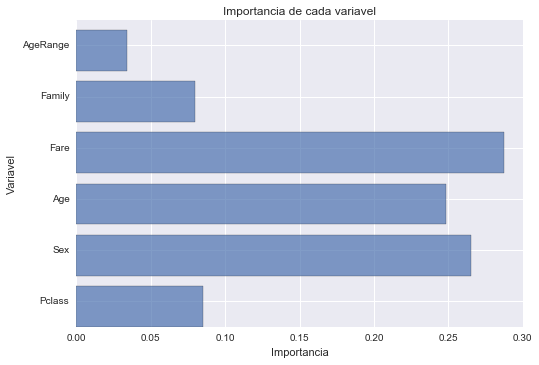

In [64]:
plt.barh(np.arange(len(feat_importance)), feat_importance, alpha=0.7)
plt.yticks(np.arange(.5,len(feat_importance),1), feat_importance.index)
plt.xlabel('Importancia')
plt.ylabel('Variavel')
plt.title('Importancia de cada variavel')

A hierarquia de importância de cada variável é bem próxima da obtida na correlação de pearson. Sendo Fare, Sex e Age as mais correlacionadas com os dados.

## Comparando o resultado - Titanic_df vs Y_pred

Será criado um dataframe com a predição (Y_pred) e os valores do X_test. É um dataframe com o objetivo de simular o resultado do titanic_df.

In [65]:
# Cria o dataframe
predicao_df = pd.DataFrame(X_test, columns=['Pclass','Sex', 'Age', 'Fare', 'Family','AgeRange'])
predicao_df['Predict'] = Y_pred
predicao_df['Survived'] = y_test

In [66]:
predicao_df.head()

,Pclass,Sex,Age,Fare,Family,AgeRange,Predict,Survived
0,3.0,1.0,26.0,7.8542,1.0,4.0,0,0
1,3.0,0.0,20.0,8.6625,0.0,4.0,0,0
2,1.0,1.0,42.0,26.2875,0.0,1.0,1,1
3,2.0,0.0,34.0,13.0000,0.0,1.0,1,1
4,1.0,0.0,30.0,56.9292,0.0,4.0,1,1


Verificando os valores para a nova coluna Predict:

In [67]:
predicao_df.groupby(['Predict']).mean()

,Pclass,Sex,Age,Fare,Family,AgeRange,Survived
Predict,,,,,,,
0,2.538462,0.837607,29.595530,20.662680,0.735043,2.888889,0.188034
1,1.854839,0.145161,31.785678,39.957124,0.709677,2.790323,0.774194


O mesmo agrupamento, só que utilizando o titanic_df:

In [68]:
titanic_df.groupby(['Survived']).mean()

,Pclass,Age,Fare,Family,SexInt
Survived,,,,,
0,2.531876,30.415100,22.917716,0.883424,0.852459
1,1.950292,28.549778,46.300019,0.938596,0.318713


Como pode ser percebido, os valores são bem aproximados. Por exemplo:
- Para os sobreviventes a idade média era 29 e no modelo predito foi 32;
- Para os sobreviventes o valor médio da passagem era 46 e no modelo predito foi 40;

Para facilitar a análise, vou plotar novamente Sex/Age/Pclass para os passageiros sobreviventes.
Primeiro será impresso os dados dos passageiros do titanic_df e na sequencia do predicao_df.

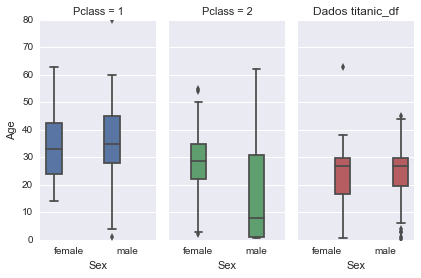

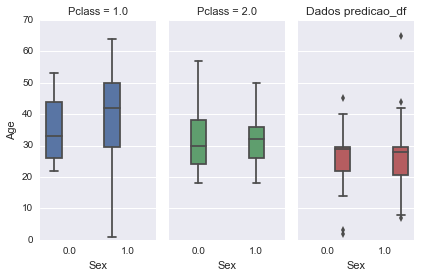

In [69]:
# Imprime gráfico com o bloxpot da idade média por genero e classe no dataframe original titanic_df
sb.factorplot(x="Sex", y="Age", hue="Pclass",
               col="Pclass", data=sobreviventes, kind="box", size=4, aspect=.5)

plt.title("Dados titanic_df")  

# Imprime gráfico com o bloxpot da idade média por genero e classe no dataframe predicao_df
predicao_sobrevivente = predicao_df[predicao_df['Predict']==1]
sb.factorplot(x="Sex", y="Age", hue="Pclass",
               col="Pclass", data=predicao_df, kind="box", size=4, aspect=.5)
plt.title("Dados predicao_df")  

In [70]:
# Média para o grupo
predicao_df.groupby(['Sex','Pclass','Predict']).mean()['Age']

Sex  Pclass  Predict
0.0  1.0     1          35.923478
     2.0     1          31.921701
     3.0     0          24.462972
             1          27.245747
1.0  1.0     0          43.633235
             1          30.659874
     2.0     0          32.105458
     3.0     0          26.364260
             1          28.500000
Name: Age, dtype: float64

In [71]:
# Total de sobreviventes por Sex/Pclass
predicao_df.groupby(['Sex','Pclass','Predict']).count()['Age'].unstack()

Predict        0     1
Sex Pclass            
0.0 1.0      NaN  17.0
    2.0      NaN  23.0
    3.0     19.0  13.0
1.0 1.0     18.0   7.0
    2.0     18.0   NaN
    3.0     62.0   2.0

Analisando a tabela acima conseguimos perceber que o modelo previu a sobrevivência para todas as passageiras da 1º e 2º Classes.

Filtros:
- Sex = 0
- Pclass = 1 e 2
- Predict = 0(Mortos): Nenhum valor - NaN
- Predict = 1(Sobreviventes): 24 + 17

## Conclusão

Na predição, apesar da média de idade das mulheres sobreviventes na 2º classe ter reduzido de 36 para 32, a idade ainda está na faixa dos Jovens Adultos e para as 18 ocorrências a predição foi sobrevivência. Em qualquer uma das duas análises há grande chance de sobrevivência para uma Jovem Adulta na 2º Classe. 

## Limitações da análise

As observações, constatações e resultados não representam a realidade dos fatos porque  estamos trabalhando somente com uma amostra incompleta dos dados.
 
A amostra tem informações sobre 891 passageiros e é sabido que 2.223 pessoas estavam a bordo do Titanic. A soma de mortos é superior ao tamanho da amostra:
832 – passageiros mortos
685 – membros da tripulação mortos
706 – sobreviventes, entre passageiros e tripulação
 
Uma outra limitação da análise são os valores que foram assumidos no lugar dos valores ausentes que possivelmente afetaram o resultado final. Algumas informações que foram criadas para auxiliar a análise:
 
1)Idade: 
Os valores nulos foram substituidos pela média geral da coluna Age

2)Preço da passagem: 
O maior valor da passagem estava muito distante do segundo maior valor, então substituí o maior valor pelo segundo maior.
Os valores zerados foram substituídos pela média geral da coluna Fare. 

A coluna Cabin foi excluída da análise por ter muitos valores nulos, mas os valores desta variável sugerem um padrão que pode ser investigado numa nova análise. O mesmo acontece com a informação do tratamento dado ao passageiro (Miss, Mrs, Mr e etc.), será que conseguimos estabelecer um padrão também para esta coluna? E este tratamento ajudaria na previsão dos resultados? Estas são algumas perguntas que não foram respondidas aqui e que por terem sido ocultadas, podem ter interferido no resultado final.

Um  fator muito importante é que os dados referem-se a seres humanos e seu comportamento e decisões no momento de risco contam com muitas variáveis que são desconhecidas por este análise. Por exemplo, os sobreviventes relatam a dificuldade em convencer alguns passageiros a embarcar, imagino que algumas mulheres tiveram dificuldades de deixar seus maridos e filhos mais velhos, talvez elas nem tenham deixado. O entendimento incorreto das ordem do capitão fez com que alguns homens em determinada localização do navio fossem autorizados a embarcar e do outro lado não. 

Por tantas existirem tantas variáveis e a falta de algumas informações não podemos atribuir um valor estatítico a este trabalho.
https://pt.wikipedia.org/wiki/RMS_Titanic


### BIBLIOGRAFIA

- Wes McKinney; Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython

Sites consultados:
- http://blog.socialcops.com/engineering/machine-learning-python
- http://developers.hekima.com/machine%20learning/python/2016/05/17/churn-prediction/
- http://hamelg.blogspot.com.br/2015/11/python-for-data-analysis-part-14.html
- http://nbviewer.jupyter.org/github/agconti/US_Dollar_Vehicle_Currency/blob/master/US_Dollar_Vehicle_Currency.ipynb
- http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb
- http://scott.fortmann-roe.com/docs/BiasVariance.html
- http://stackoverflow.com/questions/36288352/how-to-get-pandas-kde-density-with-horizontal-orientation
- http://work.caltech.edu/library/014.html
- http://work.caltech.edu/library/index.html
- http://www.r2d3.us/visual-intro-to-machine-learning-part-1/
- http://www.reshamsarkar.com/projects/2016/3/30/titanic-trauma-data-cleaning-and-munging
- http://www.ultravioletanalytics.com/2014/11/03/kaggle-titanic-competition-part-ii-missing-values/
- https://github.com/agconti/kaggle-titanic/blob/master/Titanic.ipynb
- https://github.com/justmarkham/scikit-learn-videos
- https://www.dataquest.io/mission/3/list-operations
- https://www.kaggle.com/c/titanic
- https://www.youtube.com/watch?v=0GrciaGYzV0
- http://www.sbmac.org.br/cmacs/cmac-ne/2012/trabalhos/PDF/122.pdf
- http://chrisstrelioff.ws/sandbox/2015/06/08/decision_trees_in_python_with_scikit_learn_and_pandas.html